# Abschlussprojekt - Data Analytics
**wurde von Dietmar Steinle verfasst**



## Die Daten verstehen

     Datensammlung:
**Importieren die erforderlichen Bibliotheken und konfigurieren Parameter**

 - Die Bibliotheken `numpy` und `pandas` für die Arbeit mit Arrays und tabellarischen Daten sowie `plotly.express` für Visualisierungen werden importiert.
 - Der Parameter `pd.options.mode.chained_assignment` wird auf `None` gesetzt, um Warnungen bei Zuweisungen über eine Kette zu vermeiden.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
pd.options.mode.chained_assignment = None

#### Datenladen aus einer CSV-Datei.
  - Die Daten werden aus der Datei `"projekt_data_kiva.csv"` mit dem Trennzeichen `"#"` geladen, die Indizierung erfolgt über die erste Spalte.
  - Die ersten drei Zeilen des Datensatzes werden zur Voransicht ausgegeben.


In [3]:
df_orig = pd.read_csv("projekt_data_kiva.csv", sep="#", index_col=0)
df_orig.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet


#### Überprüfung der Spaltennamen.
  - Eine Liste der Spaltennamen im Datensatz wird ausgegeben.


In [5]:
df_orig.columns

Index([' funded_amount', ' loan_amount', ' activity', ' sector', ' use',
       ' country_code', ' country', ' region', ' currency', ' term_in_months',
       ' lender_count', ' borrower_genders', ' repayment_interval'],
      dtype='object')

#### Umbenennen der Spalten.
  - Die Spalten werden umbenannt, um Leerzeichen am Anfang und Ende der Namen zu entfernen.


In [7]:
df_orig.rename(columns=pd.Series(df_orig.columns.str.strip(),index=df_orig.columns).to_dict(), inplace=True)
df_orig.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'term_in_months',
       'lender_count', 'borrower_genders', 'repayment_interval'],
      dtype='object')


#### Erhalten von Informationen über die Daten.
  - Informationen über den Datensatz werden angezeigt, einschließlich der Anzahl der Zeilen, der Datentypen der Spalten und der Anzahl der Nicht-Null-Werte.


In [9]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.7+ MB



#### Statistische Datenanalyse.
  - Eine statistische Zusammenfassung für numerische Spalten wird angezeigt, einschließlich des Mittelwerts, der Standardabweichung usw.


In [11]:
df_orig.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000



#### Suche nach Duplikaten.
  - Die Suche und Anzeige von Zeilen, die Duplikate sind, wird durchgeführt.


In [13]:
df_orig.loc[df_orig.duplicated(keep=False),:]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
327,275.0,275.0,Farming,Agriculture,to buy fertilizers and other farm supplies.,PH,Philippines,"Brookes Point, Palawan",PHP,8.0,8,female,irregular
392,100.0,100.0,Home Energy,Personal Use,to buy a solar lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
405,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
498,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
606,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14.0,4,male,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13.0,0,female,monthly



#### Analyse fehlender Werte.
  - Der prozentuale Anteil fehlender Werte pro Spalte wird berechnet und angezeigt.


In [15]:
round((df_orig.isna().mean()*100).sort_values(ascending=False),2)

region                8.46
use                   0.63
borrower_genders      0.63
country_code          0.00
funded_amount         0.00
loan_amount           0.00
activity              0.00
sector                0.00
country               0.00
currency              0.00
term_in_months        0.00
lender_count          0.00
repayment_interval    0.00
dtype: float64


#### Datenbereinigung von fehlenden Werten und weitere Vorverarbeitung.
  - Zeilen mit fehlenden Werten in bestimmten Spalten werden gelöscht.
  - Weitere Vorverarbeitung der Daten wird durchgeführt, einschließlich der Auffüllung fehlender Werte basierend auf dem Modus nach Ländern.

In [17]:
df_orig.loc[(df_orig.use.isna() | df_orig.borrower_genders.isna()), :]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,NaN,PEN,20.0,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,NaN,TZS,10.0,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,NaN,TZS,10.0,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,NaN,USD,20.0,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,NaN,KES,13.0,0,NaN,monthly


In [19]:
df_orig.drop(df_orig[df_orig.use.isna()].index, inplace=True)
round((df_orig.isna().mean()*100).sort_values(ascending=False),2)

region                7.88
country_code          0.00
funded_amount         0.00
loan_amount           0.00
activity              0.00
sector                0.00
use                   0.00
country               0.00
currency              0.00
term_in_months        0.00
lender_count          0.00
borrower_genders      0.00
repayment_interval    0.00
dtype: float64

In [21]:
country_modes=dict()
country_isna = df_orig.country_code[df_orig.region.isna()].unique()
for c_code in country_isna:
    c_mode = df_orig.loc[df_orig.country_code == c_code, "region"].mode()
    country_modes[c_code] = c_mode[0] if len(c_mode) else f"{c_code}-unknown"

#### Auffüllen fehlender Regionen basierend auf Ländermodi.
  - Für jeden einzigartigen Ländercode, bei dem die Region fehlt (`country_isna`), wird die Region mit Werten aus dem Wörterbuch `country_modes` aufgefüllt.
  - Nach dem Auffüllen der fehlenden Regionswerte wird der prozentuale Anteil fehlender Werte in allen Spalten berechnet und in absteigender Reihenfolge angezeigt.


In [23]:
for c_code in country_isna:
    df_orig.loc[df_orig.country_code == c_code,"region"] = country_modes[c_code]
round((df_orig.isna().mean()*100).sort_values(ascending=False),2)

country_code          0.0
funded_amount         0.0
loan_amount           0.0
activity              0.0
sector                0.0
use                   0.0
country               0.0
region                0.0
currency              0.0
term_in_months        0.0
lender_count          0.0
borrower_genders      0.0
repayment_interval    0.0
dtype: float64


#### Zählung fehlender Werte.
  - Die Anzahl der fehlenden Werte in jeder Spalte des Datensatzes wird angezeigt.


In [25]:
df_orig.isna().sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          8
country               0
region                0
currency              0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64


#### Suche nach Zeilen mit fehlendem Ländercode.**
  - Zeilen, in denen der Ländercode fehlt, werden angezeigt.


In [27]:
df_orig.loc[df_orig.country_code.isna(), :]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,6.0,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,6.0,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7.0,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,7.0,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7.0,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,NAD,7.0,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,NAD,7.0,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,NAD,7.0,183,female,bullet



#### Korrektur des Ländercodes für Namibia.
  - Für Zeilen, in denen das Land als "Namibia" angegeben ist, wird der Ländercode auf "NA" korrigiert.
  - Nach der Korrektur wird die Anzahl der fehlenden Werte in jeder Spalte erneut angezeigt.


In [29]:
df_orig.loc[df_orig.country == "Namibia", "country_code"]="NA"
df_orig.isna().sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
region                0
currency              0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64


#### Abrufen der Liste der Spalten mit Textdaten.
  - Eine Liste der Spalten wird angezeigt, deren Daten einen Text- (Objekt-)Typ haben.


In [31]:
df_orig.columns[df_orig.dtypes == object]

Index(['activity', 'sector', 'use', 'country_code', 'country', 'region',
       'currency', 'borrower_genders', 'repayment_interval'],
      dtype='object')


#### NaN Snonyme suchen, Anzeigen einzigartiger Werte für Textspalten.
  - Eine Liste von Spalten mit Textdaten wird erstellt, ausgenommen "use", "borrower_genders" und "region", die nich untersucht werden.
  - Für jede Spalte aus der erstellten Liste werden einzigartige Werte angezeigt.


In [33]:
obj_cols=list(df_orig.columns[df_orig.dtypes == object])
obj_cols.remove("use")
obj_cols.remove("borrower_genders")
obj_cols.remove("region")
for col in obj_cols:
    print(df_orig[col].unique())

['Fruits & Vegetables' 'Rickshaw' 'Transportation' 'Embroidery'
 'Milk Sales' 'Services' 'Dairy' 'Beauty Salon' 'Manufacturing'
 'Food Production/Sales' 'Wholesale' 'General Store' 'Clothing Sales'
 'Poultry' 'Tailoring' 'Sewing' 'Bakery' 'Restaurant' 'Food Stall'
 'Farming' 'Construction Supplies' 'Personal Products Sales'
 'Home Products Sales' 'Natural Medicines' 'Fish Selling'
 'Education provider' 'Shoe Sales' 'Machinery Rental' 'Butcher Shop'
 'Pigs' 'Personal Expenses' 'Food Market' 'Cosmetics Sales'
 'Personal Housing Expenses' 'Retail' 'Energy' 'Grocery Store'
 'Construction' 'Agriculture' 'Motorcycle Transport' 'Charcoal Sales'
 'Food' 'Pharmacy' 'Fishing' 'Timber Sales' 'Cattle' 'Electronics Repair'
 'Electronics Sales' 'Vehicle' 'Cafe' 'Blacksmith'
 'Higher education costs' 'Used Clothing' 'Fuel/Firewood' 'Upholstery'
 'Animal Sales' 'Cereals' 'Vehicle Repairs' 'Arts'
 'Cloth & Dressmaking Supplies' 'Mobile Phones' 'Spare Parts' 'Clothing'
 'Metal Shop' 'Barber Shop' 'Furni


#### Gruppierung der Daten mit Zählung der Anfragen.
  - Die Daten werden nach allen Spalten gruppiert, und für jede einzigartige Kombination wird die Anzahl der Anfragen gezählt.
  - Die Spalte mit der Anzahl der Anfragen wird in "requests_count" umbenannt.


In [35]:
df_uniq = df_orig.groupby(df_orig.columns.tolist (), as_index= False ).size()
df_uniq.rename(columns={"size":"requests_count"}, inplace=True)
df_uniq

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval,requests_count
0,0.0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,"female, female",monthly,1
1,0.0,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,"female, female",monthly,3
2,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,female,monthly,3
3,0.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Lahore,PKR,13.0,0,female,monthly,1
4,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624992,50000.0,50000.0,Renewable Energy Products,Retail,to distribute solar home systems throughout ru...,ZW,Zimbabwe,Harare,USD,13.0,720,male,monthly,1
624993,50000.0,50000.0,Renewable Energy Products,Retail,to generate income to over 600 fishermen in Ta...,TZ,Tanzania,MUSOMA,USD,14.0,782,female,irregular,1
624994,50000.0,50000.0,Renewable Energy Products,Retail,to provide life-changing clean cookstoves and ...,KE,Kenya,Kisii,USD,14.0,1402,female,irregular,1
624995,50000.0,50000.0,Water Distribution,Services,to set up 13 new clean water businesses in nor...,GH,Ghana,Tamale,USD,14.0,1688,female,irregular,1



#### Überprüfung der Daten nach Geschlecht der Kreditnehmer.
  - Einträge werden ausgewählt, in denen das Wort "male" nicht im Spalte "borrower_genders" enthalten ist, das heißt, alle Wörter sind "male" oder "female".


In [37]:
df_uniq.loc[~df_uniq.borrower_genders.str.contains("male"),:]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval,requests_count



#### Berechnung der Anzahl männlicher und weiblicher Kreditnehmer.
  - Für jede Zeile werden die Spalten "male_count" und "female_count" hinzugefügt, die die Anzahl der Männer bzw. Frauen enthalten.
  - Die Gesamtzahl der Antragsteller wird als Summe von "male_count" und "female_count" berechnet.


In [39]:
df_uniq[['male_count','female_count']]=df_uniq.apply(lambda x: pd.Series([
                                                        x['borrower_genders'].replace(" ","").split(",").count("male"),
                                                        x['borrower_genders'].replace(" ","").split(",").count("female")
                                                      ]),
              axis=1)
df_uniq["applicants_count"] = df_uniq.male_count + df_uniq.female_count
df_uniq

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval,requests_count,male_count,female_count,applicants_count
0,0.0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,"female, female",monthly,1,0,2,2
1,0.0,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,"female, female",monthly,3,0,2,2
2,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,female,monthly,3,0,1,1
3,0.0,25.0,Livestock,Agriculture,Reviewed loan use in english.,PK,Pakistan,Lahore,PKR,13.0,0,female,monthly,1,0,1,1
4,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13.0,0,female,monthly,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624992,50000.0,50000.0,Renewable Energy Products,Retail,to distribute solar home systems throughout ru...,ZW,Zimbabwe,Harare,USD,13.0,720,male,monthly,1,1,0,1
624993,50000.0,50000.0,Renewable Energy Products,Retail,to generate income to over 600 fishermen in Ta...,TZ,Tanzania,MUSOMA,USD,14.0,782,female,irregular,1,0,1,1
624994,50000.0,50000.0,Renewable Energy Products,Retail,to provide life-changing clean cookstoves and ...,KE,Kenya,Kisii,USD,14.0,1402,female,irregular,1,0,1,1
624995,50000.0,50000.0,Water Distribution,Services,to set up 13 new clean water businesses in nor...,GH,Ghana,Tamale,USD,14.0,1688,female,irregular,1,0,1,1



#### Entfernen der Spalte "borrower_genders".
  - Die Spalte "borrower_genders" wird aus dem DataFrame entfernt.
  - Die ersten drei Zeilen des aktualisierten DataFrames werden zur Voransicht angezeigt.


In [41]:
df_uniq.drop(columns="borrower_genders", inplace=True)
df_uniq.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,requests_count,male_count,female_count,applicants_count
0,0.0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,monthly,1,0,2,2
1,0.0,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,2,2
2,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,1,1



#### Abrufen von Informationen über den DataFrame.**
  - Informationen über den DataFrame werden angezeigt, einschließlich der Datentypen der Spalten und der Anzahl der Nicht-Null-Werte.


In [43]:
df_uniq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624997 entries, 0 to 624996
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       624997 non-null  float64
 1   loan_amount         624997 non-null  float64
 2   activity            624997 non-null  object 
 3   sector              624997 non-null  object 
 4   use                 624997 non-null  object 
 5   country_code        624997 non-null  object 
 6   country             624997 non-null  object 
 7   region              624997 non-null  object 
 8   currency            624997 non-null  object 
 9   term_in_months      624997 non-null  float64
 10  lender_count        624997 non-null  int64  
 11  repayment_interval  624997 non-null  object 
 12  requests_count      624997 non-null  int64  
 13  male_count          624997 non-null  int64  
 14  female_count        624997 non-null  int64  
 15  applicants_count    624997 non-nul


#### Speichern der verarbeiteten Daten.**
  - Der verarbeitete DataFrame wird in einer Pickle-Datei unter dem Namen "df_kiva_uniq.pkl" für die weitere Verwendung gespeichert.

In [45]:
df_uniq.to_pickle("df_kiva_uniq.pkl")

#### Definition von Funktionen zur Berechnung von Ausreißergrenzen.
  - `outs`: Eine Funktion zur Berechnung der äußeren Grenzen von Ausreißern basierend auf Quartilen.
  - `outs_ser`: Eine Funktion für eindimensionale Daten (`Series`), die Quartile verwendet, um die Grenzen von Ausreißern zu bestimmen.
  - `outs_df`: Eine Funktion für DataFrames (`DataFrame`), die `outs` auf jede numerische Spalte anwendet und ein Wörterbuch mit den Ausreißergrenzen zurückgibt.


In [47]:
def outs(q25 = 0, q75 = 1):
    delta = q75 - q25
    return q25 - delta*1.5, q75 + delta*1.5  

def outs_ser(df = None): # für Series
    if df is None:
        return
    return outs(df.quantile(.25), df.quantile(.75))

def outs_df(df = None): #für DataFrame
    if df is None:
        return   
    out = {}
    dsc = df.describe()
    for ds in dsc.columns:
        out[ds]=outs(dsc[ds]["25%"],dsc[ds]["75%"])
    return out


#### Berechnung der Ausreißergrenzen für `df_uniq`.
  - Anwendung von `outs_df` auf den DataFrame `df_uniq`, um die Ausreißergrenzen für jede numerische Spalte zu erhalten.


In [49]:
dc_outs = outs_df(df_uniq)
dc_outs

{'funded_amount': (-737.5, 1962.5),
 'loan_amount': (-750.0, 2050.0),
 'term_in_months': (-1.0, 23.0),
 'lender_count': (-21.5, 54.5),
 'requests_count': (1.0, 1.0),
 'male_count': (-1.5, 2.5),
 'female_count': (1.0, 1.0),
 'applicants_count': (1.0, 1.0)}


#### Installation der Bibliothek `kaleido` für den Export von Grafiken.
  - Wird verwendet, um die Bibliothek `kaleido` zu installieren, die notwendig ist, um Plotly-Grafiken als Bilder zu speichern.


In [52]:
 !pip install -U kaleido


#### Erstellung und Speicherung eines Boxplots für `df_uniq`.
  - Visualisierung von Ausreißern mit einem Boxplot für numerische Spalten in `df_uniq`, unter Verwendung der in `dc_outs` definierten Grenzen.
  - Der Grafik wird als Datei `boxplot1.png` gespeichert.


In [ ]:
boxplot1 = px.box(data_frame=df_uniq,
                  y=list(dc_outs.keys()), 
                  template="plotly_white",
                  title="Überprüfung der Datenausreißer"
                 )
boxplot1.update_layout(title_x=0.5)

boxplot1.write_image("boxplot1.png")

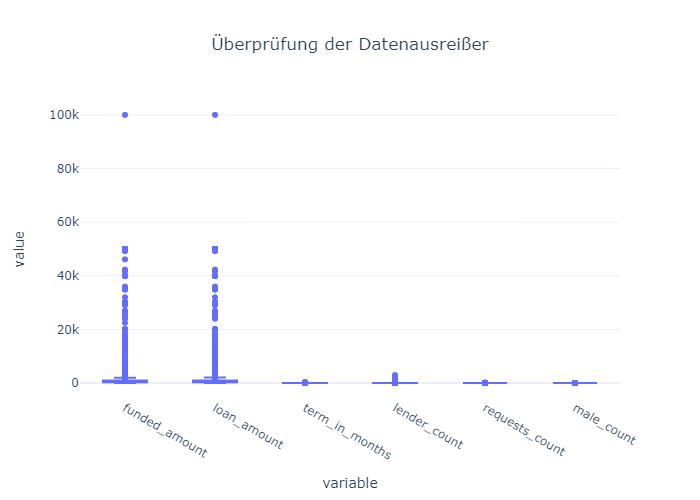


#### Filterung von Werten über 50,000 in `loan_amount`.
  - Suche nach Einträgen in `df_uniq`, bei denen der Kreditbetrag (`loan_amount`) 50,000 überschreitet.


In [53]:
df_uniq.loc[(df_uniq.loan_amount > 50000),:]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,requests_count,male_count,female_count,applicants_count
624996,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Fontamara(Centre-Ville),USD,75.0,2986,irregular,1,0,1,1



#### Erstellung eines bereinigten DataFrames `df_clean`.**
  - Filterung von `df_uniq`, um Werte von `loan_amount` über 50,000 auszuschließen und Analyse der deskriptiven Statistik des resultierenden DataFrames.


In [55]:
df_clean = df_uniq.loc[df_uniq.loan_amount <= 50000,:]
df_clean.describe()

,funded_amount,loan_amount,term_in_months,lender_count,requests_count,male_count,female_count,applicants_count
count,624996.000000,624996.000000,624996.000000,624996.000000,624996.000000,624996.000000,624996.000000,624996.000000
mean,822.007341,880.710277,13.786111,21.452372,1.067162,0.426809,1.632242,2.059052
std,1148.296220,1209.196989,8.510758,28.797347,0.894458,1.149333,3.128062,3.512892
min,0.000000,25.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,275.000000,300.000000,8.000000,7.000000,1.000000,0.000000,1.000000,1.000000
50%,500.000000,500.000000,13.000000,14.000000,1.000000,0.000000,1.000000,1.000000
75%,950.000000,1000.000000,14.000000,26.000000,1.000000,1.000000,1.000000,1.000000
max,50000.000000,50000.000000,158.000000,1765.000000,153.000000,44.000000,50.000000,50.000000



#### Berechnung und Entfernung von Spalten.
  - Im `df_clean` wird eine neue Spalte `funded_rating`, gleich dem Verhältnis von `funded_amount` zu `loan_amount`, hinzugefügt.
  - Die Spalte `funded_amount` wird entfernt.


In [57]:
df_clean["funded_rating"] = df_clean.funded_amount / df_clean.loan_amount
df_clean.drop(columns="funded_amount", inplace=True)
df_clean.head(3)

,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,requests_count,male_count,female_count,applicants_count,funded_rating
0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,monthly,1,0,2,2,0.0
1,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,2,2,0.0
2,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,1,1,0.0



#### Visualisierung von `funded_rating` mit einem Boxplot.**
  - Erstellung und Anzeige eines Boxplots zur Bewertung von Ausreißern in `funded_rating`.


In [ ]:
boxplot2 = px.box(data_frame=df_clean,
                  y="funded_rating", 
                  template="plotly_white",
                  title="Überprüfung der Datenausreißer funded_rating"
                 )
boxplot2.update_layout(title_x=0.5)

boxplot2.write_image("boxplot2.png")

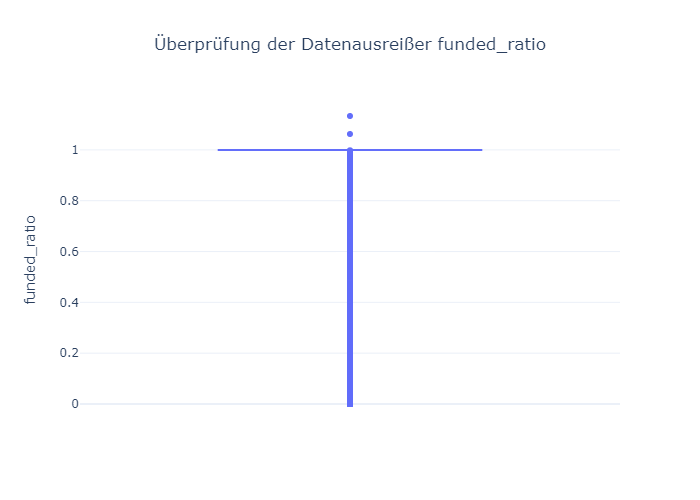


#### Korrektur von Werten in `funded_rating` über 1.**
  - Werte von `funded_rating` über 1 werden auf 1 korrigiert.


In [59]:
df_clean.loc[df_clean.funded_rating > 1,"funded_rating"]=1


#### Erstellung und Speicherung eines Boxplots für `loan_amount` in `df_clean`.
  - Visualisierung von Ausreißern für `loan_amount` mit einem Boxplot und Speicherung der Grafik als `boxplot3.png`.


In [ ]:
boxplot3 = px.box(data_frame=df_clean,
                  y="loan_amount", 
                  template="plotly_white",
                  title="Überprüfung der Datenausreißer loan_amount"
                 )
boxplot3.update_layout(title_x=0.5)

boxplot3.write_image("boxplot3.png")

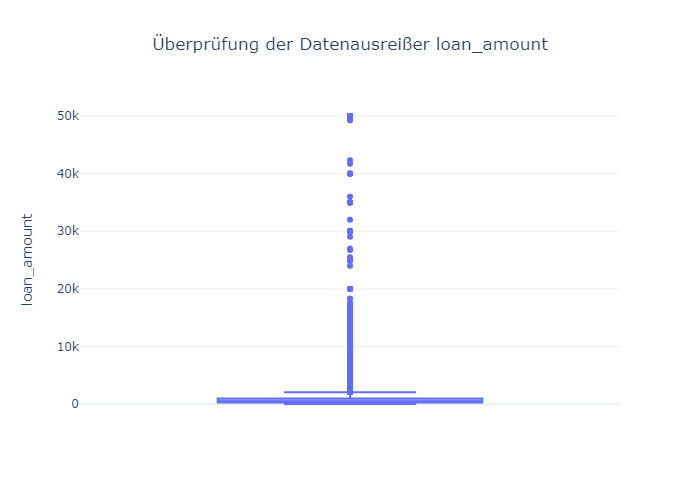

In [61]:
df_test=pd.read_pickle("df_kiva_uniq.pkl")
df_test.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,requests_count,male_count,female_count,applicants_count
0,0.0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,monthly,1,0,2,2
1,0.0,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,2,2
2,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,0,1,1



#### Analyse von `loan_amount` in `df_clean`.
  - Anzeige der deskriptiven Statistik und Berechnung der Ausreißergrenzen für `loan_amount`.


In [63]:
ds_loan=df_clean.loan_amount
ds_loan.describe(), outs_ser(ds_loan)

(count    624996.000000
 mean        880.710277
 std        1209.196989
 min          25.000000
 25%         300.000000
 50%         500.000000
 75%        1000.000000
 max       50000.000000
 Name: loan_amount, dtype: float64,
 (-750.0, 2050.0))

In [65]:
#print(outs_ser(df_test.loan_amount))
print(outs_ser(df_test.loan_amount[df_test.loan_amount < 2050.0]))
print(outs_ser(df_test.loan_amount[df_test.loan_amount < 1712.0]))
print(outs_ser(df_test.loan_amount[df_test.loan_amount < 1587.5]))
outs_ser(df_test.loan_amount[df_test.loan_amount < 1525.0])

(-587.5, 1712.5)
(-512.5, 1587.5)
(-475.0, 1525.0)


(-475.0, 1525.0)


#### Definition von Funktionen zur Arbeit mit Ausreißern.
  - `outlers_get_borders`: Eine Funktion zur rekursiven Bestimmung der Ausreißergrenzen.
  - `outlers_to_cats`: Eine Funktion zur Kategorisierung von Krediten basierend auf Ausreißergrenzen.
  - `outlers_info`: Eine Funktion zur Anzeige von Informationen über Ausreißer nach Kategorien.


In [113]:
def outlers_get_borders(ds=None, l_outs=None, iteration = 0):
    
    max_iterations = 50  # overflow protection
    if iteration >= max_iterations:
        return
        
    if ds is None:
        ds = pd.Series
        return
    
    ds_outs = outs_ser(ds)
    if l_outs is None:
        l_outs=[]
        b1 = ds_outs[0]
    else:
        b1=l_outs[-1]
        
    b2 = ds_outs[1]
    while outs_ser(ds[(ds>b1) & (ds <= b2)])[1] != b2:
        b2 = outs_ser(ds[(ds>b1) & (ds <= b2)])[1]
        
    
    if b2<ds.max():
        l_outs.append(b2)
        outlers_get_borders(ds[(ds>b2) & (ds <= ds.max())], l_outs, iteration+1)
        
    return sorted(l_outs,reverse=True)

def outlers_to_cats(df=None, col_name_cats="loan_category", col_name_nums="loan_amount"):
    if df is None:
        df=pd.DataFrame
        return
    cat_borders=outlers_get_borders(df[col_name_nums])
    if len(cat_borders)>3:
        cat_borders = cat_borders[-3:]
        print(cat_borders)
    cat_names=["elevated", "middling", "modest"]
    df[col_name_cats] = "high"
    for i,v in enumerate(cat_borders):
        
        df.loc[df[col_name_nums] <= v, col_name_cats] = cat_names[i]

def outlers_info(df=None, col_name_cats="loan_category"):
    if df is None:
        df=pd.DataFrame
        return
    len_df=len(df)
    dc_outs = outs_df(df)
    for col in dc_outs.keys():
        in_sum=0
        for cat in df[col_name_cats].unique():
            ds_temp = df.loc[(df[col_name_cats]==cat),col]
            dc_outs_temp = outs_ser(ds_temp)
            outs_count = ds_temp[ds_temp > dc_outs_temp[1]].count()
            in_sum+=outs_count
            print(f"{col}[{cat}]: {dc_outs_temp} Datenausreißer: {outs_count}")
        print(f"Allgemein nach Spalte '{col}': {in_sum} = {in_sum/len_df:.2%} \n")


#### Ermittlung der Ausreißergrenzen für `loan_amount`.
  - Verwendung von `outlers_get_borders` zur Bestimmung der Ausreißergrenzen in `loan_amount`.


In [69]:
outlers_get_borders(df_clean.loan_amount)

[14800.0, 5825.0, 1525.0]


#### Kategorisierung von Krediten und Analyse von Ausreißern.
  - Anwendung von `outlers_to_cats` auf `df_clean`, um Kredite basierend auf ihren Beträgen zu kategorisieren.
  - Verwendung von `outlers_info` zur Analyse von Ausreißern in Bezug auf Kreditkategorien.

In [71]:
#1525, 5825, 14800
outlers_to_cats(df_clean)

#### Visualisierung von Ausreißern nach Kreditkategorien.
  - Erstellung und Anzeige eines Boxplots für `loan_amount` nach Kreditkategorien (`loan_category`) zur Analyse von Ausreißern in jeder Kategorie.


In [ ]:
boxplot4 = px.box(data_frame=df_clean,
                  x="loan_category",
                  y="loan_amount", 
                  template="plotly_white",
                  title="Überprüfung der Datenausreißer loan_amount durch loan_category"
                 )
boxplot4.update_layout(title_x=0.5)

boxplot4.write_image("boxplot4.png")

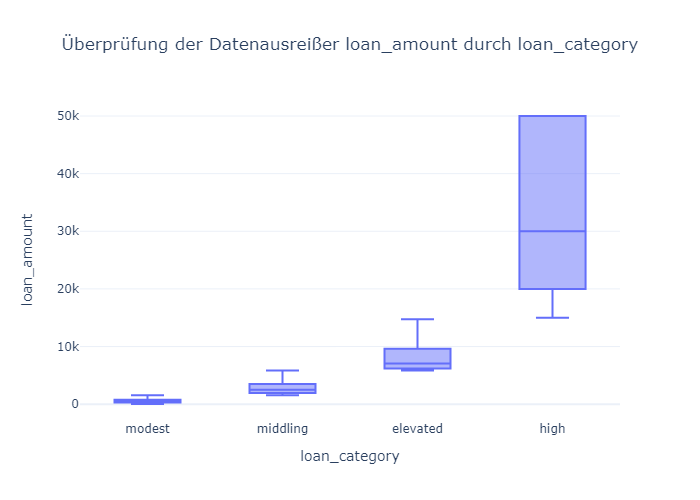



#### Überprüfung der Spalten in `df_clean`.
  - Anzeige einer Liste der Spalten im bereinigten DataFrame `df_clean`.


In [73]:
df_clean.columns

Index(['loan_amount', 'activity', 'sector', 'use', 'country_code', 'country',
       'region', 'currency', 'term_in_months', 'lender_count',
       'repayment_interval', 'requests_count', 'male_count', 'female_count',
       'applicants_count', 'funded_rating', 'loan_category'],
      dtype='object')


#### Hinzufügen von Spalten mit Geschlechterverhältnissen und Entfernen der ursprünglichen Spalten.
  - In `df_clean` werden die Spalten `ratio_men` und `ratio_women` hinzugefügt, die das Verhältnis von Männern bzw. Frauen unter den Antragstellern darstellen.
  - Die Spalten `male_count` und `female_count` werden entfernt.


In [75]:
df_clean = df_clean.assign(ratio_men = df_clean.male_count/df_clean.applicants_count,
                           ratio_women = df_clean.female_count/df_clean.applicants_count)
df_clean.drop(columns=['male_count', 'female_count'], inplace=True)
df_clean.head(3)

,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,repayment_interval,requests_count,applicants_count,funded_rating,loan_category,ratio_men,ratio_women
0,25.0,Games,Entertainment,Kiva Coordinator replaced loan use. Should see...,KE,Kenya,Kisii,KES,13.0,0,monthly,1,2,0.0,modest,0.0,1.0
1,25.0,Livestock,Agriculture,Kiva Coordinator fixed issue loan (no longer v...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,2,0.0,modest,0.0,1.0
2,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,Kisii,KES,13.0,0,monthly,3,1,0.0,modest,0.0,1.0



#### Arbeit mit zusätzlichen Spalten.**
  - In # In[41] wird die Spalte `applicant_equity` hinzugefügt, die den Anteil des Kredits pro Antragsteller zeigt.
  - In # In[42] wird die Spalte `ratio_men` entfernt, da sie redundant ist (`ratio_men = 1 - ratio_women`).


In [77]:
df_clean.drop(columns="ratio_men", inplace=True) #ratio_men=1-ratio_women

In [79]:
df_clean["applicant_equity"] = (df_clean.loan_amount/df_clean.applicants_count)/df_clean.loan_amount


#### Entfernung ungenutzter Spalten.**
  - Die Spalten `applicants_count`, `term_in_months` und `requests_count` werden nacheinander entfernt, um die Datenstruktur zu vereinfachen.


In [81]:
df_clean.drop(columns="applicants_count", inplace=True)

In [83]:
df_clean.term_in_months[df_clean.term_in_months==0]

Series([], Name: term_in_months, dtype: float64)


#### Berechnung des monatlichen Rückzahlungsanteils vom Kredit.**
  - Die Spalte `monthly_refund_percentage` wird hinzugefügt, die den Anteil der monatlichen Rückzahlung an der Gesamtkreditsumme darstellt.


In [85]:
df_clean["monthly_refund_percentage"] = (df_clean.loan_amount/df_clean.term_in_months)/df_clean.loan_amount

In [87]:
df_clean.drop(columns="term_in_months", inplace=True)

In [89]:
df_clean.drop(columns="requests_count", inplace=True)


#### Berechnung und Anzeige der Korrelationsmatrix.
  - Es wird eine Korrelationsmatrix `df_corr` für `df_clean` erstellt, auf drei Dezimalstellen gerundet.
  - Dies hilft, mögliche Zusammenhänge zwischen den Variablen zu identifizieren.


In [91]:
df_corr = df_clean.corr(numeric_only=True).round(3)
df_corr

,loan_amount,lender_count,funded_rating,ratio_women,applicant_equity,monthly_refund_percentage
loan_amount,1.000,0.798,-0.115,-0.067,-0.407,-0.073
lender_count,0.798,1.000,0.092,-0.062,-0.293,-0.150
funded_rating,-0.115,0.092,1.000,0.148,-0.016,0.164
ratio_women,-0.067,-0.062,0.148,1.000,-0.051,0.164
applicant_equity,-0.407,-0.293,-0.016,-0.051,1.000,-0.190
monthly_refund_percentage,-0.073,-0.150,0.164,0.164,-0.190,1.000



#### Visualisierung der Korrelationsmatrix.
  - Plotly Express (`px.imshow`) wird verwendet, um die Korrelationsmatrix `df_corr` zu visualisieren.
  - Der Graph zeigt den Grad der Korrelation zwischen den Variablen unter Verwendung einer Farbskala.


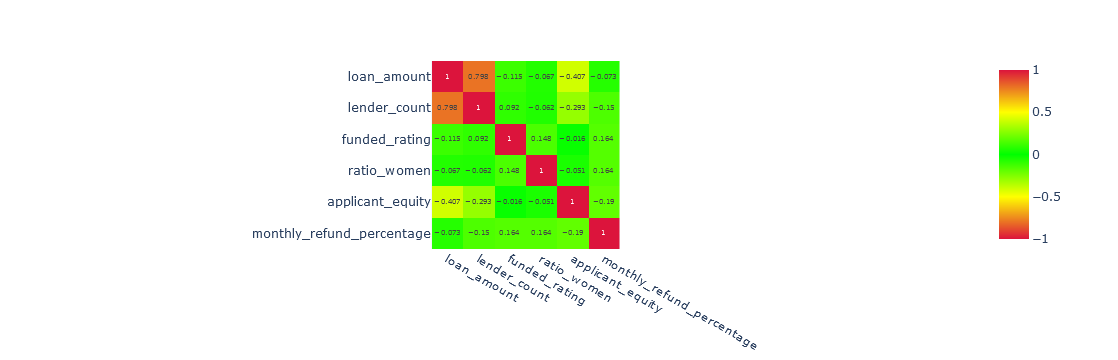

In [93]:
imshowplot1 = px.imshow(df_corr,
                        text_auto=True,
                        color_continuous_scale = ['crimson','yellow', 'lime', 'yellow', 'crimson'],
                        zmin=-1,
                        zmax=1
                       )

imshowplot1.show()


#### Anreicherung der Daten mit Ländercodes.
  - Eine CSV-Datei mit ISO-Ländercodes (`ccodes`) wird geladen.
  - `df_clean` wird mit `ccodes` zusammengeführt, um 3-Buchstaben-ISO-Ländercodes (`country_code_iso3`) hinzuzufügen, unter Verwendung von 2-Buchstaben-Ländercodes (`country_code`).


In [95]:
ccodes=pd.read_csv("wikipedia-iso-country-codes.csv")
df_clean = df_clean.merge(ccodes[["Alpha-2 code", "Alpha-3 code"]],
         how="inner",
         left_on="country_code",
         right_on="Alpha-2 code"
        ).drop(columns = ['Alpha-2 code'])
df_clean.rename(columns={"Alpha-3 code":"country_code_iso3"}, inplace=True)


#### Funktionen zur Umwandlung von Textdaten in Kategorien und zum Entfernen ungenutzter Kategorien.**
  - `df_to_cats`: wandelt Spalten mit Textdaten in Kategorien um, wenn weniger als 600 einzigartige Werte vorhanden sind.
  - `df_del_unused_cats`: entfernt ungenutzte Kategorien aus kategorialen Spalten.


In [97]:
def df_to_cats(df = None):
    if df is None:
        return
    for col in df.columns[df.dtypes == object]:
        if df[col].nunique() < 600:
            df[col] = df[col].astype('category')
    return df

def df_del_unused_cats(df = None):
    if df is None:
        return
    for col in df.columns[df.dtypes == "category"]:
        df[col].cat.remove_unused_categories()
    return df.info()


#### Anwendung der Funktionen auf `df_clean` und Anzeige von Informationen über den DataFrame.
  - Werden Informationen über `df_clean` vor und nach der Umwandlung von Textdaten in Kategorien angezeigt.


In [99]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623466 entries, 0 to 623465
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_amount                623466 non-null  float64
 1   activity                   623466 non-null  object 
 2   sector                     623466 non-null  object 
 3   use                        623466 non-null  object 
 4   country_code               623466 non-null  object 
 5   country                    623466 non-null  object 
 6   region                     623466 non-null  object 
 7   currency                   623466 non-null  object 
 8   lender_count               623466 non-null  int64  
 9   repayment_interval         623466 non-null  object 
 10  funded_rating              623466 non-null  float64
 11  loan_category              623466 non-null  object 
 12  ratio_women                623466 non-null  float64
 13  applicant_equity           62

In [101]:
df_clean=df_to_cats(df_clean)

In [103]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623466 entries, 0 to 623465
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_amount                623466 non-null  float64 
 1   activity                   623466 non-null  category
 2   sector                     623466 non-null  category
 3   use                        623466 non-null  object  
 4   country_code               623466 non-null  category
 5   country                    623466 non-null  category
 6   region                     623466 non-null  object  
 7   currency                   623466 non-null  category
 8   lender_count               623466 non-null  int64   
 9   repayment_interval         623466 non-null  category
 10  funded_rating              623466 non-null  float64 
 11  loan_category              623466 non-null  category
 12  ratio_women                623466 non-null  float64 
 13  applicant_equi

#### Neuordnung der Kategorien in der Spalte `loan_category`.
  - Die Kategorien in `loan_category` werden in aufsteigender Reihenfolge neu geordnet: von "modest" zu "high".

In [105]:
df_clean.loan_category=df_clean.loan_category.cat.reorder_categories(["modest","middling","elevated","high"],
                                                                     ordered=True)

#### Speichern des bereinigten und verarbeiteten DataFrames.
  - `df_clean` wird im Pickle-Format unter dem Namen "df_kiva_clean.pkl" für die spätere Verwendung gespeichert.

In [107]:
df_clean.to_pickle("df_kiva_clean.pkl")